In [371]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [372]:
df = pd.read_csv("/home/victor/Datasets/Data-Science/SpaceShip/train.csv")

In [373]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


### Рассмотрим, что означает каждый из столбцов: <br>
**PassengerId:** Уникальный идентификатор. Пассажиры путешевствуют семьями. Id: gggg_pp. gggg - номер группы, pp - номер человека в группе. <br>
**HomePlanet:** планета улета пассажира <br>
**CryoSleep:**  находится ли в анабиозе <br>
**Cabin:** Каюта находится пассажир. палуба/номер/борт <br>
**Destination:** планета высадки <br>
**Age:** возраст <br>
**VIP:** оплатил ли особое обсуживание. По сути является ли VIP персоной <br>
**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck:** Сумма, которую пассажир заплатил за каждый из множества роскошных удобств космического корабля. <br>
**Name:** Полное имя пассажира <br>
**Transported:** Был ли пассажир перенесен в другое измерение <br>

In [374]:
df.info(), df.shape, df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


(None,
 (8693, 14),
 Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
        'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'Name', 'Transported'],
       dtype='object'))

In [375]:
cat_df = df.select_dtypes(include=['object', 'bool'])
num_df = df.select_dtypes(exclude=['object', 'bool'])

In [376]:
cat_df.columns, num_df.columns

(Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
        'Name', 'Transported'],
       dtype='object'),
 Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object'))

In [377]:
# функция для подсвета nan-ов в процентах
def getNanPercentage(df: pd.DataFrame) -> None:
    nan_df = (df.isnull().mean() * 100).reset_index()
    nan_df.columns = ["column_name", "percentage"]
    nan_df.sort_values("percentage", ascending=False, inplace=True)
    return nan_df.head(nan_df.shape[0])

### Анализ категориальных признаков

In [378]:
cat_df.describe(include=['object', 'bool'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,False,Ankalik Nateansive,True
freq,1,4602,5439,8,5915,8291,2,4378


In [379]:
getNanPercentage(cat_df)

,column_name,percentage
2,CryoSleep,2.496261
5,VIP,2.335212
1,HomePlanet,2.312205
6,Name,2.300702
3,Cabin,2.289198
4,Destination,2.093639
0,PassengerId,0.000000
7,Transported,0.000000


Процент Nan у каждого столбца менее 3-х процентов => можем их спокойно заполнить медианными значениями

Исследуем зависимость Transported от каждого из категориальных признаков

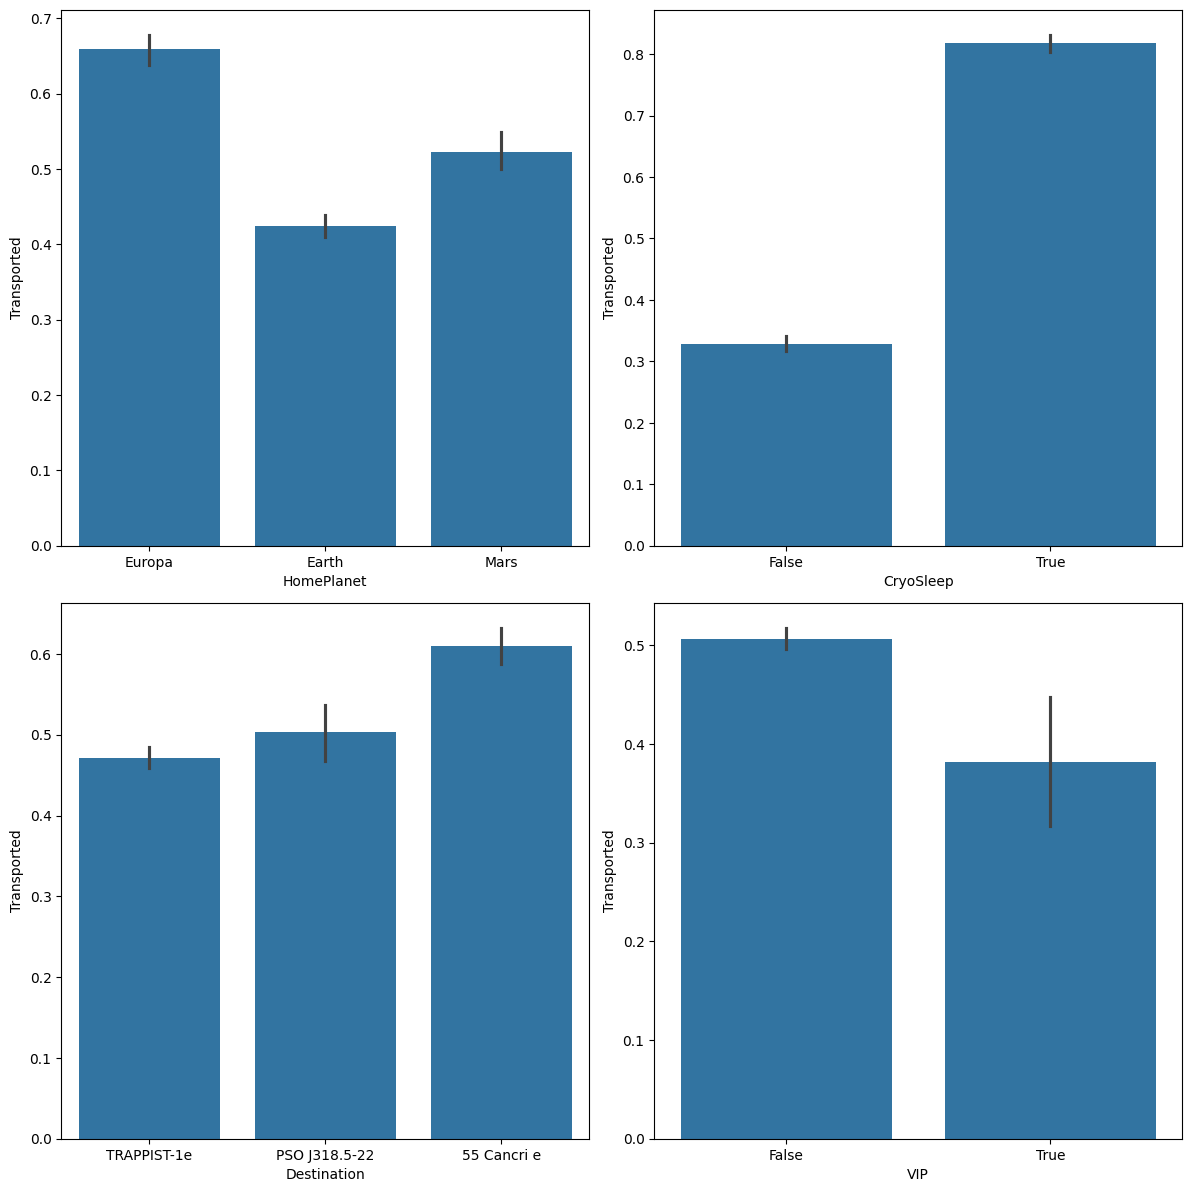

In [380]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes_flattened = axes.reshape(-1)

for idx, col in enumerate(cat_df.columns.drop(
    ["Transported", "Cabin", "PassengerId", "Name"])):
    ax = axes_flattened[idx]
    sns.barplot(
        x=col,
        y='Transported',
        data=cat_df,
        ax=ax,
    )

fig.tight_layout(pad=1.0)

Из графиков видно, что: <br>
1) Больше всего из представленных на Transported влияет параметр CryoSleep <br>
2) Если человек находился во сне, то он, скорее всего, переместился, если не спал, то, скорее всего, нет <br>
3) Люди без статуса VIP с большей вероятностью могут быть перемещены <br>
4) Люди с планеты Европы перемещаются с наибольшей вероятнотсью. С наименьшей - с Земли <br>
5) Пункт доставки также может влиять на перемещение, хотя и не очень сильно <br>

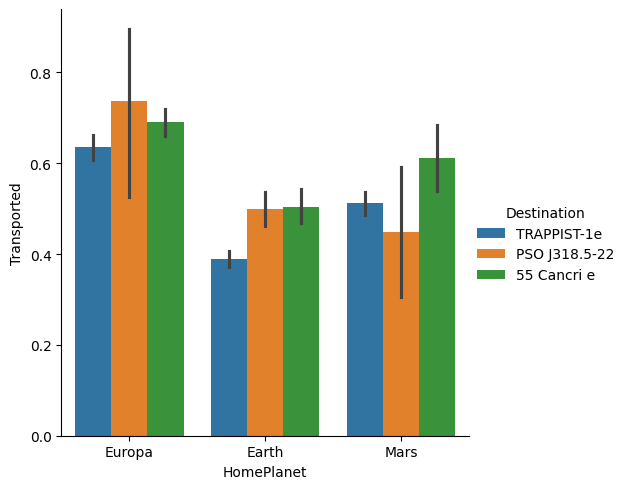

In [381]:
sns.catplot(data=cat_df, x="HomePlanet", y="Transported", hue="Destination", kind="bar")

Из графика видно, что в большей степени все зависит от HomePLanet. Параметр Destination также влияет на выживаемость внутри классов HomePlanet

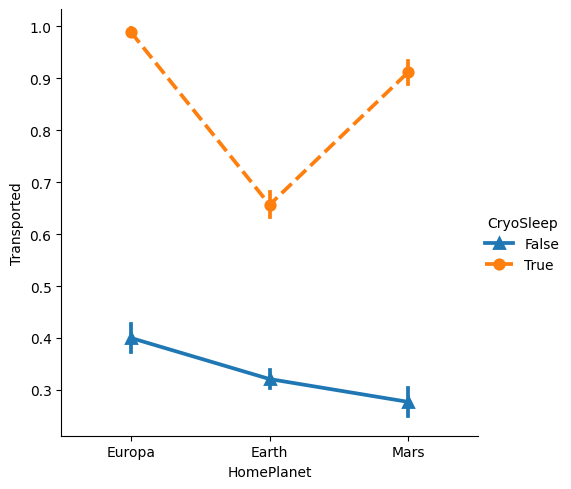

In [382]:
sns.catplot(
    data=cat_df, x="HomePlanet", y="Transported", hue="CryoSleep",
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

Люди, которые находятся во сне с Европы имеют почти 100% выживаемость. Самая низкая выживаемость у людей с Марса: около 30%

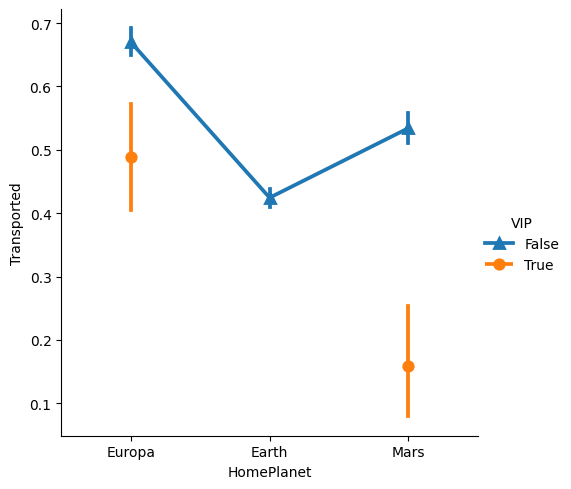

In [383]:
sns.catplot(
    data=cat_df, x="HomePlanet", y="Transported", hue="VIP",
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

Интересное наблюдение заключается в том, что VIP с Земли нет.

In [384]:
# разделение PassengerId и Cabin
cat_df[["NumGroup", "NumInGroup"]] = cat_df["PassengerId"].str.split("_", expand=True).astype(int)
cat_df[["Deck", "CabinNum", "Side"]] = cat_df["Cabin"].str.split("/", expand=True)
cat_df["CabinNum"] = cat_df["CabinNum"].astype("Int64")

In [385]:
cat_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported,NumGroup,NumInGroup,Deck,CabinNum,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False,1,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True,2,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False,3,1,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False,3,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True,4,1,F,1,S


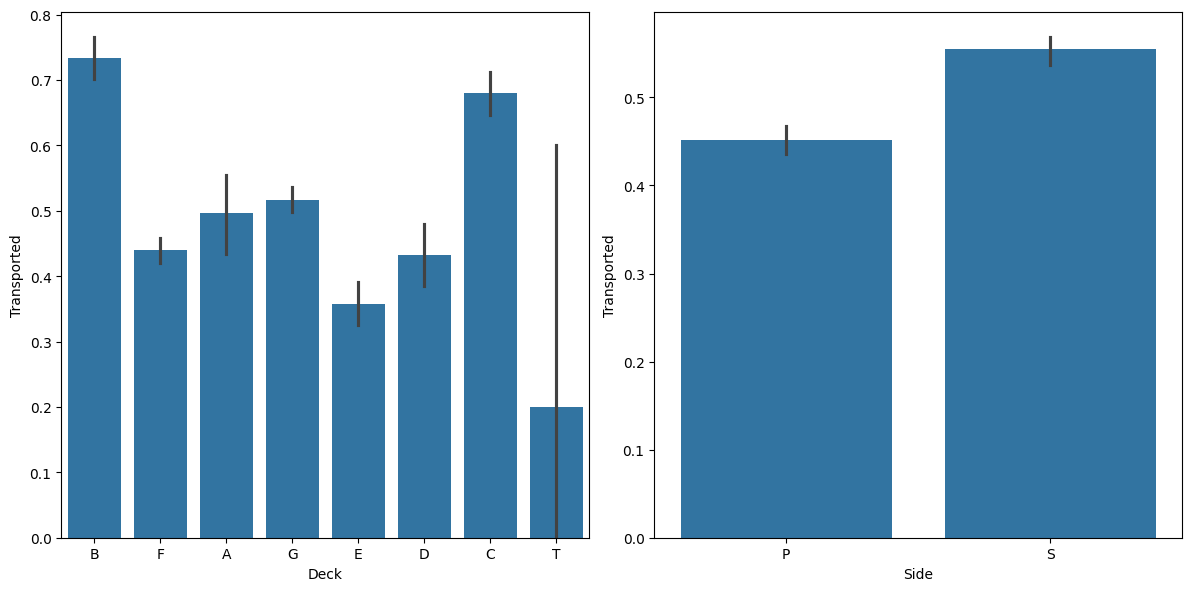

In [386]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes_flattened = axes.reshape(-1)

sns.barplot(x="Deck", y='Transported', data=cat_df, ax=axes[0])
sns.barplot(x="Side", y='Transported', data=cat_df, ax=axes[1])

fig.tight_layout(pad=1.0)

1) степень переносимости не сильно зависит от класса кабины <br>
2) Люди на стороне S выживают немного чаще

In [387]:
cat_df["Deck"].value_counts()

Deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

<Axes: xlabel='Deck', ylabel='VIP'>

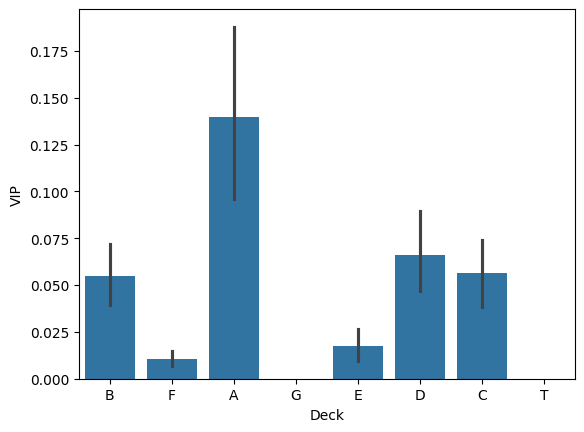

In [388]:
sns.barplot(x="Deck", y='VIP', data=cat_df)

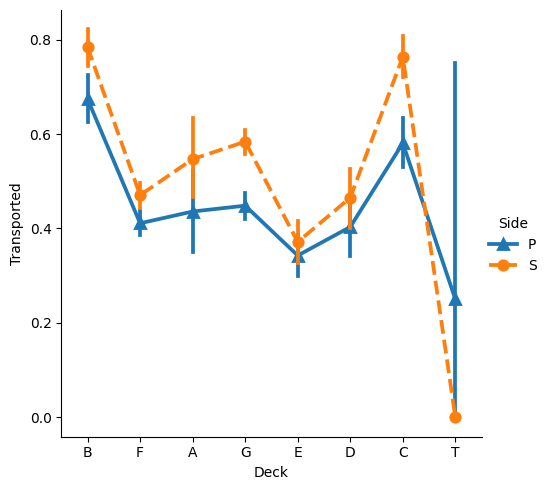

In [389]:
sns.catplot(
    data=cat_df, x="Deck", y="Transported", hue="Side",
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)

Чаще всего перемещаются люди с правого борта

Из представленного можно сделать вывод, что чем раньше в алфавите встречается буква, тем выше класс

In [390]:
cat_df[['NumGroup', 'NumInGroup']].groupby(['NumGroup']).count().describe()

,NumInGroup
count,6217.000000
mean,1.398263
std,0.944051
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8.000000


В основном люди путешевствуют по одному

In [391]:
counts = cat_df['NumGroup'].value_counts()
cat_df['CountInGroup'] = cat_df['NumGroup'].map(counts).astype(int)

<Axes: xlabel='CountInGroup', ylabel='Transported'>

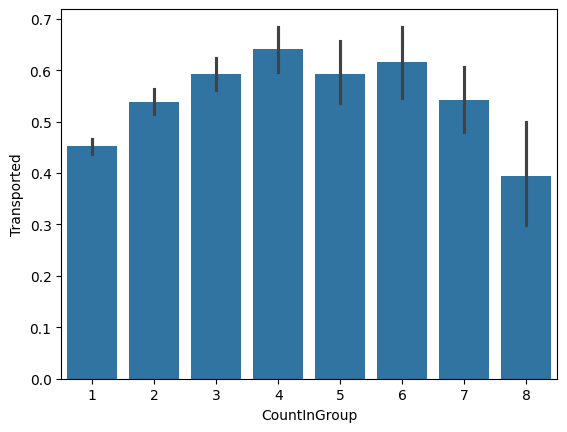

In [392]:
sns.barplot(
    x="CountInGroup",
    y='Transported',
    data=cat_df,
)

Из графика видно, что чаще всего перемещаются люди, которые путешевствовали в группе ил 3-6 человек

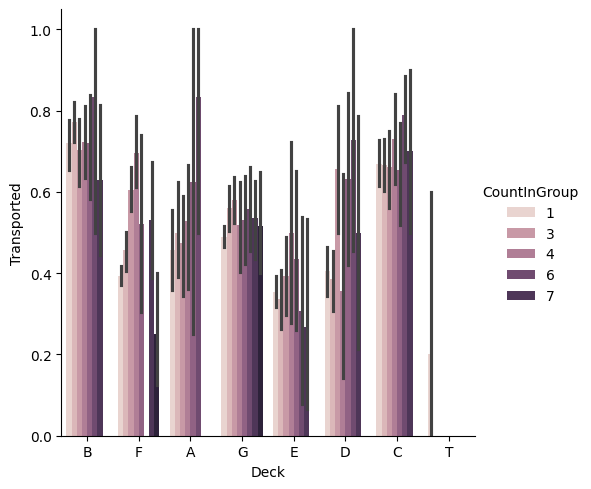

In [393]:
sns.catplot(data=cat_df, x="Deck", y="Transported", hue="CountInGroup", kind="bar")

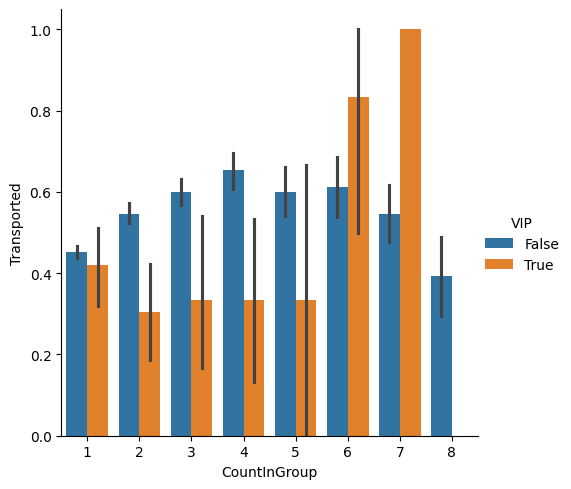

In [394]:
sns.catplot(data=cat_df, x="CountInGroup", y="Transported", hue="VIP", kind="bar")

Очень высокая вероятность перемещения у людей, путешевствующих в группе из 6-7 человек со статусом VIP

### Числовые признаки

In [395]:
num_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: >

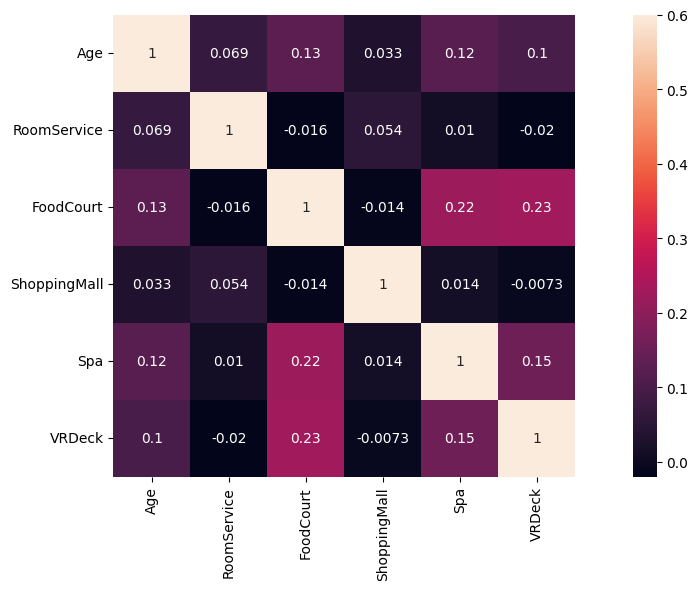

In [396]:
plt.figure(figsize=(15,6))
sns.heatmap(num_df.corr(), vmax=0.6, square=True, annot=True)

Сильной корреляции между какими-либо призаками не обнаружено

Для более удобного анализа сразу преобразуем **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** в один признак

In [397]:
getNanPercentage(num_df)

,column_name,percentage
3,ShoppingMall,2.392730
5,VRDeck,2.162660
2,FoodCourt,2.105142
4,Spa,2.105142
1,RoomService,2.082135
0,Age,2.059128


хоть стало легче для анализа, но появилось много Nan значений. Поэтому лучше сначала заполнить значения Nan. Будем считать, что Nan = 0

In [398]:
for col in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
    num_df[col] = num_df[col].fillna(0.0)

In [399]:
num_df["Service"] = pd.Series([0.0] * num_df.shape[0])
for col in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
    num_df["Service"] += num_df[col]

In [400]:
new_num_df = num_df.assign(Transported=df["Transported"])

<Axes: >

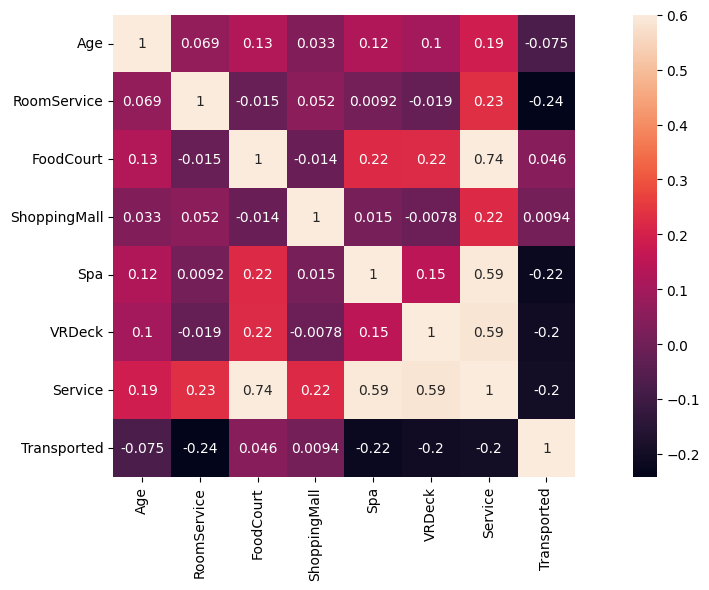

In [401]:
corr_matrix = new_num_df.corr(numeric_only=True)
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, vmax=0.6, square=True, annot=True)

Аналогично сильной корреляции между какими-либо призаками не обнаружено. За исключением признаков, связанных с Service. Корреляция между ними и Transported имеется, хоть и совсем небольшая

<Axes: xlabel='Age', ylabel='Service'>

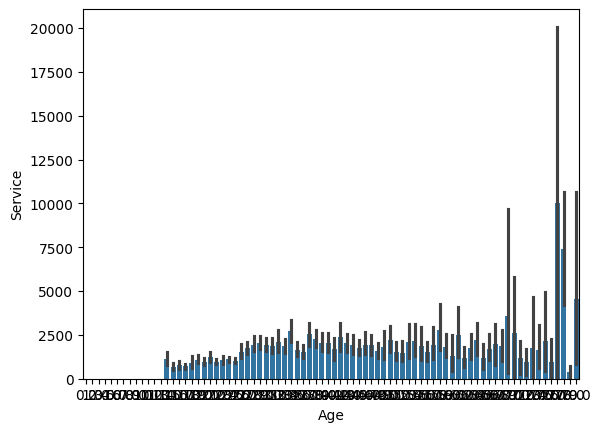

In [402]:
sns.barplot(data=new_num_df, x='Age', y='Service')

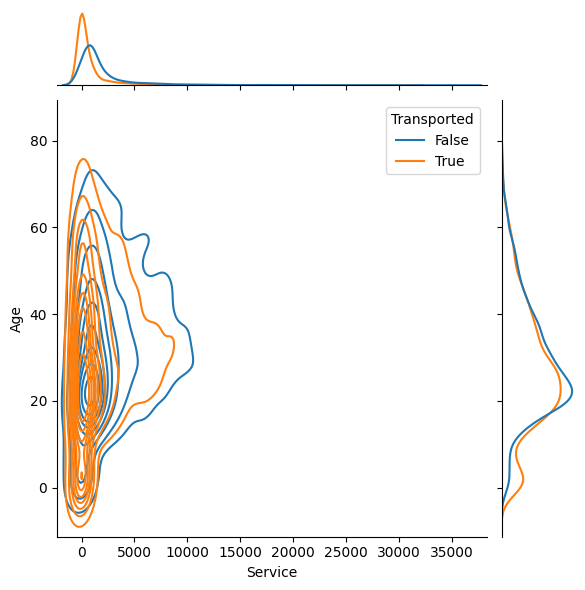

In [403]:
sns.jointplot(data=new_num_df, x="Service", y="Age", hue="Transported", kind="kde")

<Axes: xlabel='Transported', ylabel='Service'>

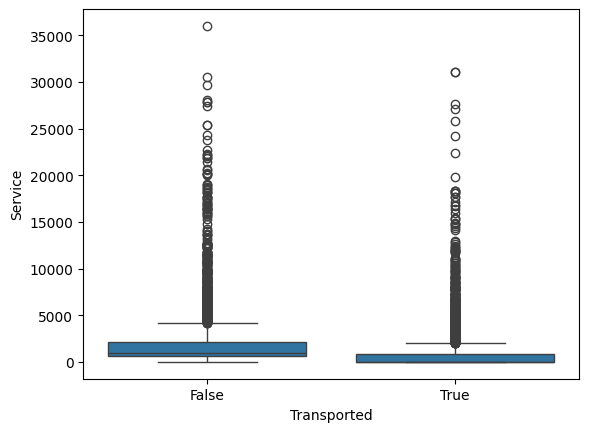

In [404]:
sns.boxplot(x='Transported', y='Service', data=new_num_df)

Из графика видно, что, в основном, в обоих случаях тратилось не очень много, хотя для **Transported=False** все же больше

<Axes: xlabel='Transported', ylabel='Age'>

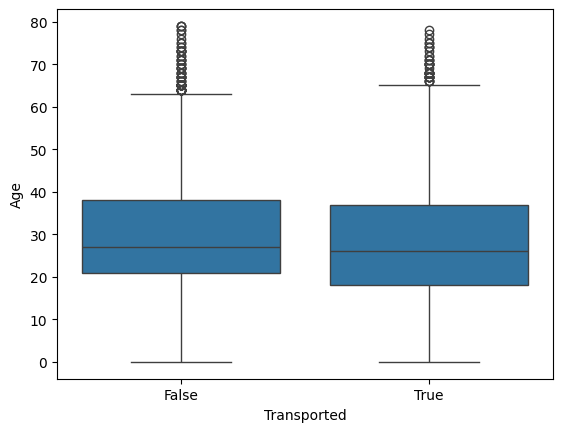

In [405]:
sns.boxplot(x='Transported', y='Age', data=new_num_df)

In [406]:
# удалим выбросы 
for col, upper_bound in (
    ('Age',
     num_df['Age'].median() + 3 * num_df['Age'].std()),
    ('Service',
     num_df['Service'].median() + 3 * num_df['Service'].std())
):
    new_num_df = new_num_df.drop(new_num_df[new_num_df[col] > upper_bound].index)

In [407]:
sns.jointplot(data=new_num_df, x="Service", y="Age", hue="Transported", kind="kde")

Можно наблюдать, что:
1) Люди, которые переместились тратили в основном меньше денег
2) Люди, которые не переместились немного страше

### Анализ категориальных и числовых признаков вместе

In [345]:
df[["NumGroup", "NumInGroup"]] = df["PassengerId"].str.split("_", expand=True).astype(int)
df[["Deck", "CabinNum", "Side"]] = df["Cabin"].str.split("/", expand=True)
df["CabinNum"] = df["CabinNum"].astype("Int64")

In [346]:
for col in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
    df[col] = df[col].fillna(0.0)
    
df["Service"] = pd.Series([0.0] * df.shape[0])
for col in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
    df["Service"] += df[col]
    

In [347]:
counts = df['NumGroup'].value_counts()
df['CountInGroup'] = df['NumGroup'].map(counts).astype(int)

In [348]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,NumGroup,NumInGroup,Deck,CabinNum,Side,Service,CountInGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,False,1,1,B,0,P,0.0,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,True,2,1,F,0,S,736.0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,False,3,1,A,0,S,10383.0,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,False,3,2,A,0,S,5176.0,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,True,4,1,F,1,S,1091.0,1


###  Описаение получившихся столбцов
**NumGroup** - номер группы, которой принадлежит человек<br>
**NumInGroup** -  номер в группе<br>
**Deck** - Палуба<br>
**CabinNum**- Номер каюты<br>
**Side** - Левый (P) или правый(S) борт<br>
**Service** - общая суммая, потраченная на корабле на развлечения<br>
**CountInGroup** - число людей в группе

In [349]:
getNanPercentage(df)

,column_name,percentage
2,CryoSleep,2.496261
6,VIP,2.335212
1,HomePlanet,2.312205
12,Name,2.300702
3,Cabin,2.289198
18,Side,2.289198
16,Deck,2.289198
17,CabinNum,2.289198
4,Destination,2.093639
5,Age,2.059128


In [350]:
df[["Deck", "Service"]].groupby("Deck").mean()

,Service
Deck,
A,3402.304688
B,2927.833119
C,4105.906292
D,2289.520921
E,1298.772831
F,982.766285
G,381.035170
T,4716.400000


Можно заметить, что больше всего тратили люди, с каютой класса T и С, меньше всего с G

In [351]:
df_copy = df.copy()

for col, upper_bound in (
    ('Age',
     num_df['Age'].median() + 3 * num_df['Age'].std()),
    ('Service',
     num_df['Service'].median() + 3 * num_df['Service'].std())
):
    df_copy = df_copy.drop(df_copy[df_copy[col] > upper_bound].index)

df_copy['ServiceBand'] = pd.cut(df_copy['Service'], bins=3, labels=list(range(3)))


<Axes: xlabel='Deck', ylabel='Age'>

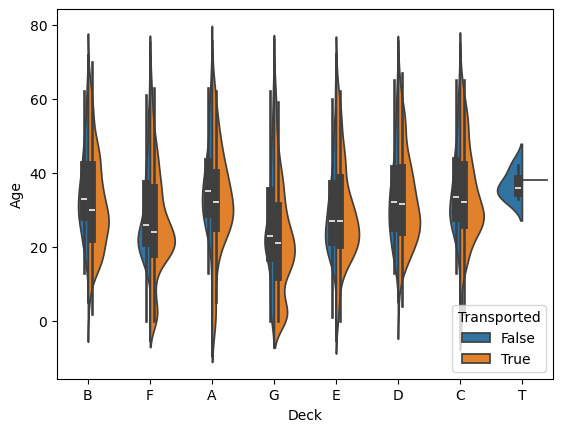

In [352]:
sns.violinplot(x="Deck", y="Age", hue="Transported", data=df_copy, split=True)

В целом перемещение зависит скорее от класса палубы

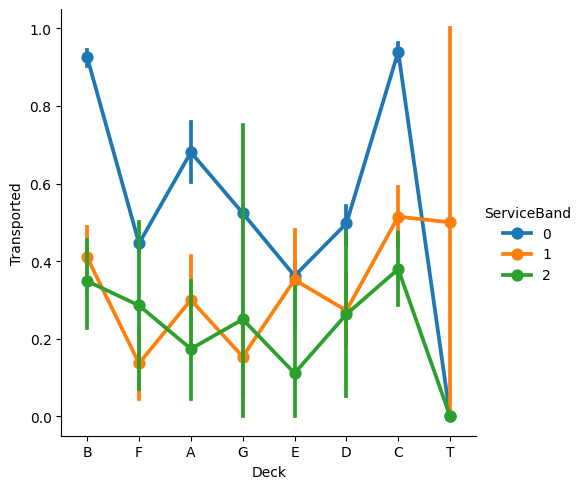

In [353]:
sns.catplot(data=df_copy, x="Deck", y="Transported", hue="ServiceBand", kind="point")

1) Практически 100% перемещение у пассажиров с каютами классов B и С, кто тратил мало.
2) Наименьшая выживаемость у людей с каютой класса T и большими тратами

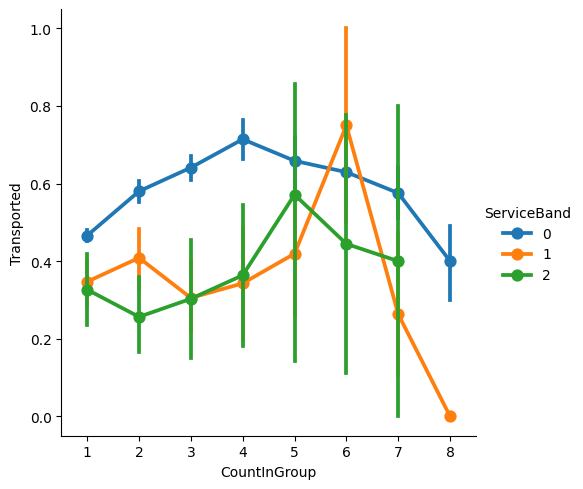

In [354]:
sns.catplot(data=df_copy, x="CountInGroup", y="Transported", hue="ServiceBand", kind="point")

Гиротеза о том, что вероятность перемещения зависит от ServiceBand, в целом, повторилась

Text(0.5, 0, 'age not is vip')

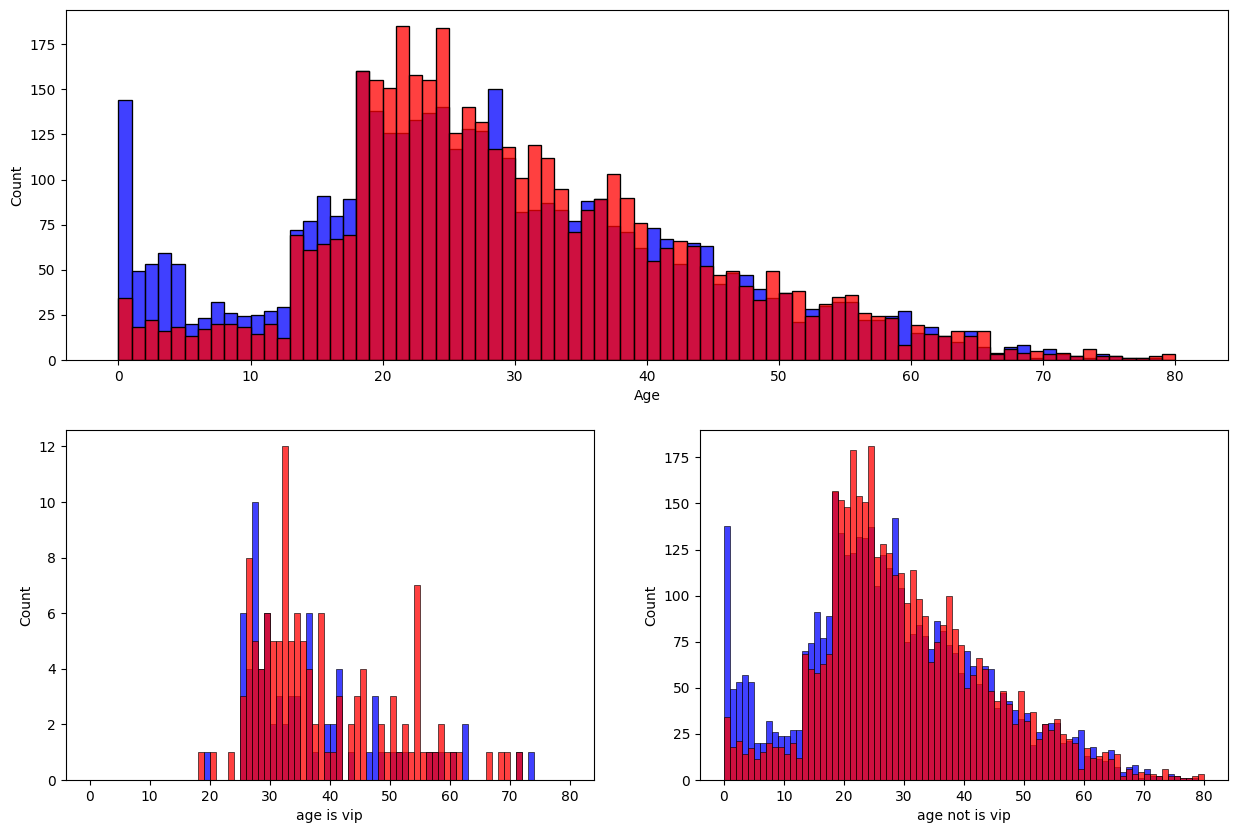

In [355]:
total_Transported = df[df['Transported']==1]
total_not_Transported = df[df['Transported']==0]
not_is_vip_Transported = df[(df['Transported']==1) & (df['VIP']==False)]
not_is_vip_Transported = total_Transported[total_Transported['VIP']==False]
is_vip_Transported = df[(df['Transported']==1) & (df['VIP']==True)]
not_is_vip_not_Transported = df[(df['Transported']==0) & (df['VIP']==False)]
is_vip_not_Transported = df[(df['Transported']==0) & (df['VIP']==True)]

fig = plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(211)
sns.histplot(total_Transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', ax = ax1)
sns.histplot(total_not_Transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', ax = ax1)
ax1.set_xlabel('Age')

ax2 = fig.add_subplot(223)
sns.histplot(is_vip_Transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', ax = ax2)
sns.histplot(is_vip_not_Transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', ax = ax2)
ax2.set_xlabel('age is vip')

ax3 = fig.add_subplot(224)
sns.histplot(not_is_vip_Transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', ax=ax3)
sns.histplot(not_is_vip_not_Transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', ax=ax3)
ax3.set_xlabel('age not is vip')

1) Чаще всего перемещаются в возрасте от 20 до 25
2) ВИП персоны в основном перемещаются только в возрастпе 30-35
3) не вип персоны переместились в основном  в возрасте 23-28
4) Age лучше будет заполнить медианным значением

In [356]:
df = df.drop(columns=['PassengerId',
                 'RoomService',
                 'FoodCourt',
                 'ShoppingMall',
                 'Spa',
                 'VRDeck',
                 'Name',
                 'NumGroup',
                 'NumInGroup',
                 'CabinNum',
                 'Cabin'
                 ])

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Side,Service,CountInGroup
0,Europa,False,TRAPPIST-1e,39.0,False,False,B,P,0.0,1
1,Earth,False,TRAPPIST-1e,24.0,False,True,F,S,736.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,False,A,S,10383.0,2
3,Europa,False,TRAPPIST-1e,33.0,False,False,A,S,5176.0,2
4,Earth,False,TRAPPIST-1e,16.0,False,True,F,S,1091.0,1


### Заполнение пустых значений

In [369]:
getNanPercentage(df)

,column_name,percentage
0,HomePlanet,0.0
1,CryoSleep,0.0
2,Destination,0.0
3,Age,0.0
4,VIP,0.0
5,Transported,0.0
6,Deck,0.0
7,Side,0.0
8,Service,0.0
9,CountInGroup,0.0


Исходя из графиков зависимости Transported от возраста для всех, vip и not vip можно сделать вывод, что лучше всего будет заполнить Age медианным значением

In [362]:
is_transported = df[df['Transported'] == True]
not_is_transported = df[df['Transported'] == False]

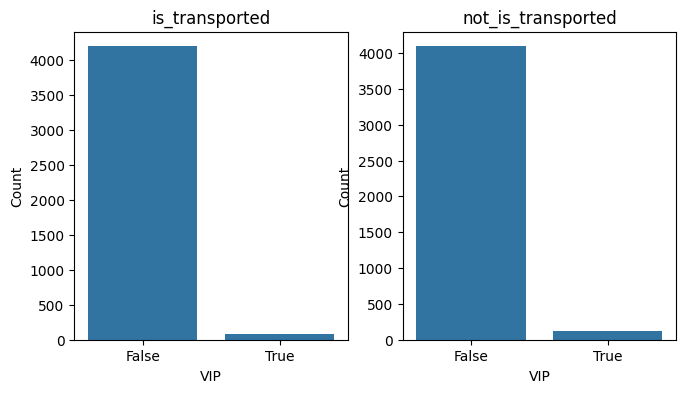

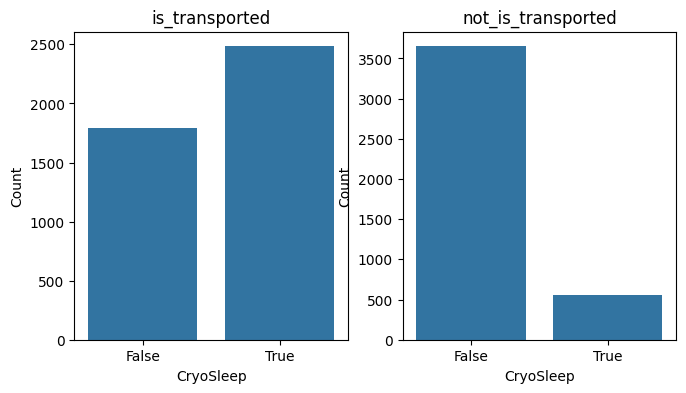

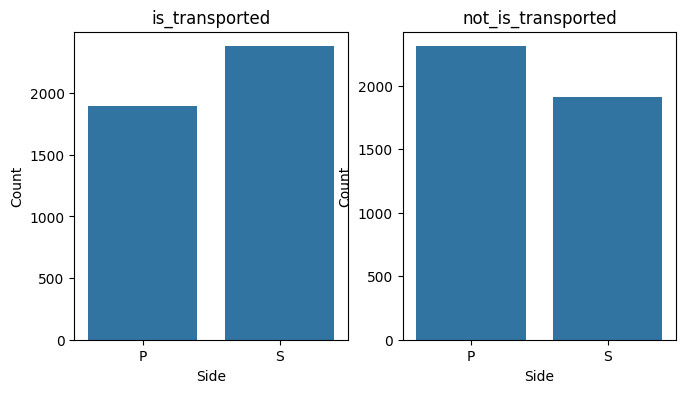

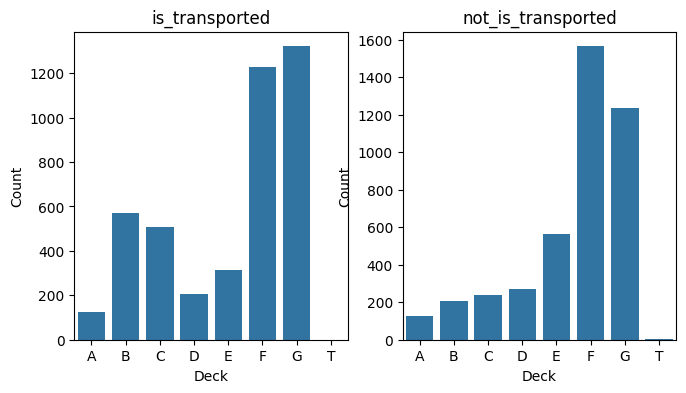

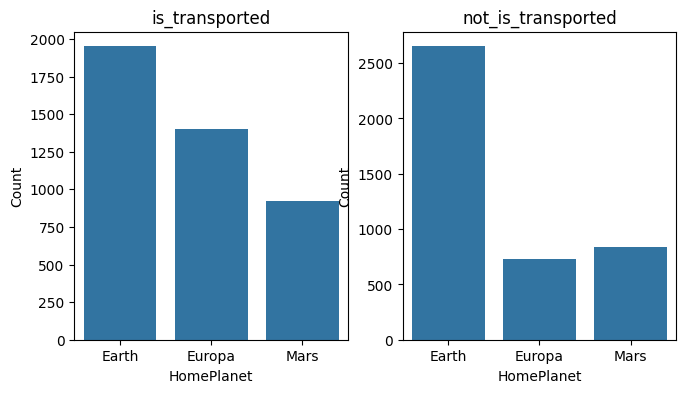

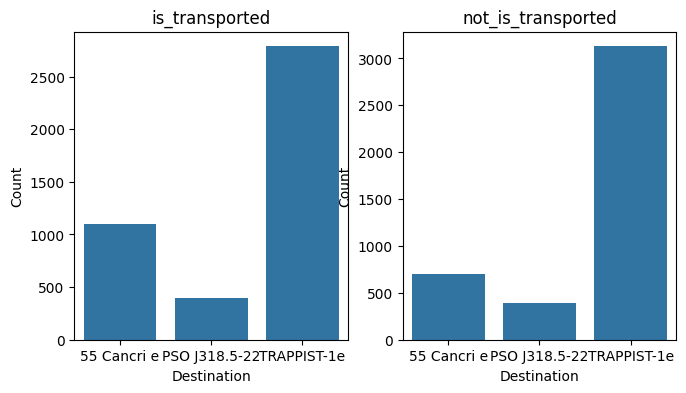

In [364]:
from itertools import chain
def plotting(col, is_transported, not_is_transported):
    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    sns.barplot(x=col, y="Count", data=is_transported, ax=ax1)
    sns.barplot(x=col, y="Count", data=not_is_transported, ax=ax2)
    ax1.set_title("is_transported")
    ax2.set_title("not_is_transported")

for col in ['VIP', 'CryoSleep', 'Side', 'Deck', 'HomePlanet', 'Destination']:
    counts = is_transported[[col, 'Service']].groupby(col).count().copy()
    new_is_transported = pd.DataFrame({col: counts.index, 'Count': list(chain(*counts.values))})
    
    counts = not_is_transported[[col, 'Service']].groupby(col).count().copy()
    new_not_is_transported = pd.DataFrame({col: counts.index, 'Count': list(chain(*counts.values))})
    plotting(col, new_is_transported, new_not_is_transported)

Nan можно заменить:
1) в VIP Fasle
2) в CryoSleep для transported: true, not transported: false
3) в Side для transported: S, not transported: P
4) в Deck лучше будет заменить все на F, несмотря на левый график
5) HomePlanet: Earth
6) Destination: TRAPPIST-1e

In [368]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Deck'] = df['Deck'].fillna(df['Deck'].mode()[0])
for col in ['VIP', 'CryoSleep', 'Side', 'HomePlanet', 'Destination']:
    df[col] = df.groupby('Transported')[col].transform(lambda x: x.fillna(x.mode()[0]))

/tmp/ipykernel_247892/255276227.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df.groupby('Transported')[col].transform(lambda x: x.fillna(x.mode()[0]))


In [370]:
df.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Side,Service,CountInGroup
0,Europa,False,TRAPPIST-1e,39.0,False,False,B,P,0.0,1
1,Earth,False,TRAPPIST-1e,24.0,False,True,F,S,736.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,False,A,S,10383.0,2
3,Europa,False,TRAPPIST-1e,33.0,False,False,A,S,5176.0,2
4,Earth,False,TRAPPIST-1e,16.0,False,True,F,S,1091.0,1
5,Earth,False,PSO J318.5-22,44.0,False,True,F,P,774.0,1
6,Earth,False,TRAPPIST-1e,26.0,False,True,F,S,1584.0,2
7,Earth,True,TRAPPIST-1e,28.0,False,True,G,S,0.0,2
8,Earth,False,TRAPPIST-1e,35.0,False,True,F,S,1018.0,1
9,Europa,True,55 Cancri e,14.0,False,True,B,P,0.0,3
